# **Registering MS COCO dataset**
- Download and decompress the dataset.
- Installing Detectron2 and other required libraries.
- Registering the dataset.
- Loading the registered dataset.
- Displaying an instance from the dataset.

In [ ]:
import os
from PIL import Image

import os
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd

import imageio

In [ ]:
# Downloading MS COCO2014 dataset

!wget http://images.cocodataset.org/zips/train2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

# !wget http://images.cocodataset.org/zips/test2014.zip


--2024-03-20 18:13:18--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.162.73, 3.5.19.101, 16.182.66.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.162.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  45.7MB/s    in 4m 58s  

2024-03-20 18:18:16 (43.2 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2024-03-20 18:18:16--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.91.172, 52.217.123.137, 16.182.40.201, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.91.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   

In [ ]:
# Unzip the dataset file

# os.chdir('/content')
!unzip train2014.zip -d /content/
!unzip val2014.zip -d /content/
!unzip annotations_trainval2014.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/val2014/COCO_val2014_000000191304.jpg  
 extracting: /content/val2014/COCO_val2014_000000171062.jpg  
 extracting: /content/val2014/COCO_val2014_000000014549.jpg  
 extracting: /content/val2014/COCO_val2014_000000121152.jpg  
 extracting: /content/val2014/COCO_val2014_000000276596.jpg  
 extracting: /content/val2014/COCO_val2014_000000029431.jpg  
 extracting: /content/val2014/COCO_val2014_000000036349.jpg  
 extracting: /content/val2014/COCO_val2014_000000502055.jpg  
 extracting: /content/val2014/COCO_val2014_000000438848.jpg  
 extracting: /content/val2014/COCO_val2014_000000364973.jpg  
 extracting: /content/val2014/COCO_val2014_000000564166.jpg  
 extracting: /content/val2014/COCO_val2014_000000323327.jpg  
 extracting: /content/val2014/COCO_val2014_000000338581.jpg  
 extracting: /content/val2014/COCO_val2014_000000039656.jpg  
 extracting: /content/val2014/COCO_val2014_000000071667.jpg  
 extracting: /conte

In [ ]:
# Install Detectron2

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
# Install other dependencies

import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [ ]:
# Register MS-COCO dataset

from detectron2.data.datasets import register_coco_instances
register_coco_instances("test_dataset_train1", {}, "/content/annotations/instances_train2014.json", "/content/train2014")
register_coco_instances("test_dataset_val1", {}, "/content/annotations/captions_val2014.json", "/content/val2014")


In [ ]:
# Load catalogs with the dataset

from detectron2.data import DatasetCatalog
dataset_dicts = DatasetCatalog.get("test_dataset_train1")

from detectron2.data import MetadataCatalog
COCO_train_metadata = MetadataCatalog.get("test_dataset_train1")

[03/14 16:39:03 d2.data.datasets.coco]: Loading /content/annotations/instances_train2014.json takes 24.43 seconds.
WARNING [03/14 16:39:03 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/14 16:39:04 d2.data.datasets.coco]: Loaded 82783 images in COCO format from /content/annotations/instances_train2014.json


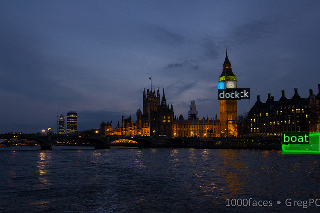

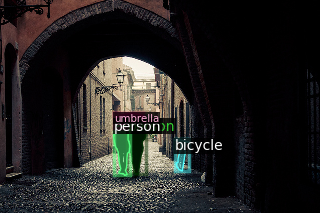

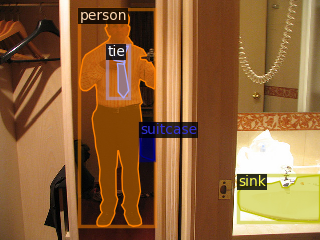

In [ ]:
# To verify the dataset is in correct format, let's visualize the annotations of randomly selected samples in the training set:

# dataset_dicts = get_balloon_dicts("/content/train2014")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=COCO_train_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])